In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [7]:
import os
import zipfile
local_zip = '/content/drive/My Drive/Hackathons/Navya_Healthcare/Dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/Dataset/train_set',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=1,
        class_mode='categorical')


Found 150 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
validation_generator = test_datagen.flow_from_directory(
        '/tmp/Dataset/test_set',
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

Found 214 images belonging to 3 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
import keras

In [15]:
def ownModel():
  model = Sequential() 
  model.add(Conv2D(32, (2, 2), input_shape = (150,150,3))) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size =(2, 2))) 
    
  model.add(Conv2D(32, (2, 2))) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size =(2, 2))) 
    
  model.add(Conv2D(64, (2, 2))) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size =(2, 2))) 
    
  model.add(Flatten()) 
  model.add(Dense(1024)) 
  model.add(Activation('relu')) 
  model.add(Dropout(0.5)) 
  model.add(Dense(1024)) 
  model.add(Activation('relu')) 
  model.add(Dropout(0.3)) 
  model.add(Dense(3, activation='softmax'))

  return model

In [16]:
def pretrainedModel():
  vgg19_model = keras.applications.vgg19.VGG19(input_shape=(150,150,3),include_top=False,weights='imagenet')

  for layer in vgg19_model.layers:
    layer.trainable=False

  model = Sequential()
  for layer in vgg19_model.layers:
      model.add(layer)
  model.layers.pop()

  model.add(Flatten())
  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.3)) 

  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.2)) 
  model.add(Dense(3, activation='softmax')) # Add the last layer
  
  return model

In [17]:
model = pretrainedModel()
model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_______________________________________________________

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

In [19]:
model_history = model.fit_generator(
        train_generator,
        
        epochs=30,
        validation_data=validation_generator,
        )

Epoch 1/30
150/150 [==============================] - 126s 843ms/step - loss: 2.7460 - accuracy: 0.6667 - val_loss: 0.3292 - val_accuracy: 0.7009
Epoch 2/30
150/150 [==============================] - 127s 844ms/step - loss: 1.1365 - accuracy: 0.8200 - val_loss: 0.0955 - val_accuracy: 0.8972
Epoch 3/30
150/150 [==============================] - 126s 837ms/step - loss: 0.4237 - accuracy: 0.9067 - val_loss: 0.0000e+00 - val_accuracy: 0.8505
Epoch 4/30
150/150 [==============================] - 125s 835ms/step - loss: 1.0028 - accuracy: 0.8400 - val_loss: 3.5763e-07 - val_accuracy: 0.9206
Epoch 5/30
150/150 [==============================] - 126s 842ms/step - loss: 0.3879 - accuracy: 0.9400 - val_loss: 4.8375e-04 - val_accuracy: 0.9393
Epoch 6/30
150/150 [==============================] - 126s 839ms/step - loss: 0.4736 - accuracy: 0.9267 - val_loss: 1.1921e-07 - val_accuracy: 0.8832
Epoch 7/30
150/150 [==============================] - 128s 851ms/step - loss: 0.1249 - accuracy: 0.9667 - va

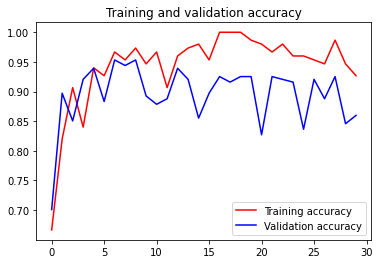

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [23]:
model.save('/content/drive/My Drive/Hackathons/Navya_Healthcare/weights')

Saving download.jpg to download.jpg
probability of image being a Banana: 0.0
probability of image being a Cat: 1.0
probability of image being a Human Palm: 0.0


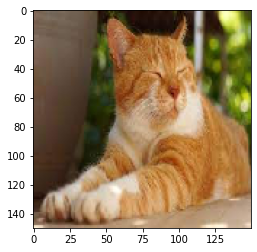

In [24]:

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  x=image.img_to_array(img)
  
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  
  
  classes = model.predict(images, batch_size=10)
  
  print("probability of image being a Banana:",classes[0][0])
  print("probability of image being a Cat:", classes[0][1])
  print("probability of image being a Human Palm:",classes[0][2])